In [18]:
% matplotlib inline
from myst_nb import glue

In [2]:
import pandas as pd
zeckenstiche = pd.read_csv("zeckenstiche.csv")
import geopandas as gpd


zeckenstiche_gpd = gpd.GeoDataFrame(zeckenstiche, 
                                    geometry=gpd.points_from_xy(zeckenstiche['x'], zeckenstiche['y']),
                                    crs = 2056) 

(chap-raeumliche-operationen)=
# Aufgabe 13: Räumliche Operationen

## Theorie

Was hat das nun bewirkt, was bringt uns diese *Geo* Erweiterung? Mit *GeoDataFrames* sind nun alle räumliche Operationen möglich, die wir bereits aus ArcGIS kennen aber mit einfachen *DataFrames* noch nicht möglich waren. Ich möchte dies an ein paar Beispielen Demonstrieren.


```{admonition} Wichtig
:class: attention

Die verschiedenen räumlichen Operationen in Geopandas erwarten unterschiedlichen Input, deshalb müssen wir manchmal zwischen *Geometrien*, *Geoseries* und *GeoDataFrames* hin- und her konvertieren (siehe {ref}`chap-pythongis-datenstruktur`). Geopandas ist noch in Arbeit und ich hoffe, dass das Package in der Zukunft noch etwas einfacher in der Handhabung wird. 

Welche Operation welcher Datentyp braucht seht ihr in [der Dokumentation](https://geopandas.org/). Was für ein Datentyp eure Variabel ist seht ihr mit `type()`.
```

### Buffer

Eine typische GIS Operation ist das "Buffern" von Objekten. Der ArcGIS Befehl ["Buffer"](https://pro.arcgis.com/en/pro-app/tool-reference/analysis/buffer.htm) erreichen wir in Geopandas mit `.buffer()`. Folgender Code macht einen Buffer mit einer Distanz von 10m. 

In [13]:
buffered = zeckenstiche_gpd.buffer(10) 

Um Geopandas-Objekte zu plotten kann man einfach `.plot()` verwenden. Zudem kann man mit `boundary` die Umrisse eines Polygons extrahieren:

<AxesSubplot:>

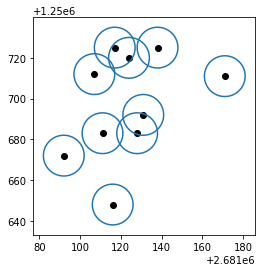

In [12]:
base = buffered.boundary.plot()        

zeckenstiche_gpd.plot(ax = base, color = "black") 

### Union und Bounding Geometry

Mit `unary_union` [^union] können wir aus unseren Einzelpunkten ein *Multipolygon* erstellen (siehe {ref}`chap-datenstruktur`). Jetzt wo die Punkten in einem Objekt sind, können wir in ESRI Terminologie eine [Minimum Bounding Geometry](https://pro.arcgis.com/de/pro-app/tool-reference/data-management/minimum-bounding-geometry.htm) darüber rechnen. Mit `convex_hull` können wir eine Konvexe Hülle um alle Punkte rechnen, also ein "Rahmen" um alle Punkte, wo die Innenwinkel immer kleiner sind als 180°. Ähnlich funktioniert `envelope`, wobei hier die Hülle quadratisch und am Koordinatensystem orientiert sein muss.

[^union]: Dieser Befehl lautet in ArcGIS [Union](https://desktop.arcgis.com/de/arcmap/10.3/tools/analysis-toolbox/union.htm)

<AxesSubplot:>

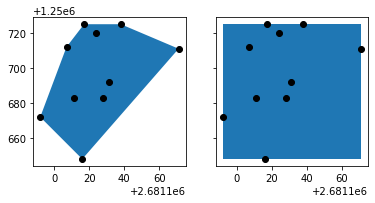

In [5]:
# Macht ein Union der Zeckenstiche (ein Multipoint-Objekt)
# (dies ist nötig, weil convex_hull / envelope Multipoint Objekte benötigen)
zeckenstiche_union = zeckenstiche_gpd["geometry"].unary_union

# Berechnet den Convex Hull und speichert den Ouput als Polygon
my_convex_hull = zeckenstiche_union.convex_hull

# Konvertiert das Polygon in eine GeoSeries
# (GeoSeries sind praktischer als Polygone)
my_convex_hull = gpd.GeoSeries(my_convex_hull)

# Berechnet das Envelope und speichert den Output als Polygon
my_envelope = zeckenstiche_union.envelope

# Konvertiert das Polygon in eine GeoSeries
# (GeoSeries sind praktischer als Polygone)
my_envelope = gpd.GeoSeries(my_envelope)

# Bereitet wieder die beiden Subplots vor (1 Zeile, 2 Spalten)
fig, (ax1, ax2) = plt.subplots(1, 2,sharex=True, sharey = True)

# Erstellt den linken Plot
my_convex_hull.plot(ax = ax1)
zeckenstiche_gpd.plot(ax = ax1, color = "black")

# Erstellt den rechten Plot
my_envelope.plot(ax = ax2)
zeckenstiche_gpd.plot(ax = ax2, color = "black")

### Overlay

Das ESRI Toolset ["Overlay"](https://pro.arcgis.com/de/pro-app/tool-reference/analysis/an-overview-of-the-overlay-toolset.htm) ist in der Funktion `overlay` verpackt. 

In [14]:
# Konvertierung GeoSeries in GeoDataFrames
buffered_gdf = gpd.GeoDataFrame(geometry = buffered, crs = 2056)               
my_convex_hull_gdf = gpd.GeoDataFrame(geometry = my_convex_hull, crs = 2056) 

In [26]:
my_difference = gpd.overlay(my_convex_hull_gdf,buffered_gdf, how='difference')

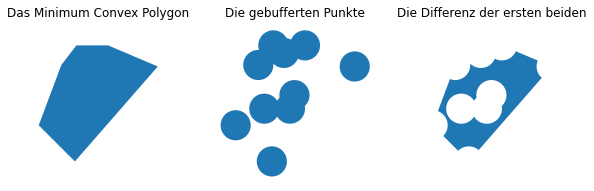

In [26]:
# Bereitet die drei Subplots vor ################
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey = True, figsize = (10,8))
#################################################

# Plot links ####################################
my_convex_hull_gdf.plot(ax = ax1)               #
ax1.set_title("Das Minimum Convex Polygon")     # 
ax1.set_axis_off()                              #
# Plot mitte ####################################
buffered_gdf.plot(ax = ax2)                     #
ax2.set_title("Die gebufferten Punkte")         # 
ax2.set_axis_off()                              #
# Plot rechts ###################################
my_difference.plot(ax = ax3)                    #
ax3.set_title("Die Differenz der ersten beiden")# 
ax3.set_axis_off()                              #
#################################################

## Übungen

Nun ist es Zeit, dass ihr selbst mit *GeoDataFrames* Hand anlegt. Achtet dabei immer auf die Datentypen eurer Daten (mit `type`) und konsultiert dazu {ref}`chap-pythongis-datenstruktur`. Zudem ist Geopandas gut dokumentiert, es lohnt ich diese immer wieder zu konsultieren: [geopandas.org](https://geopandas.org)

% *DataFrame* zu *GeoDataFrame*
### Übung 13.1

Importiere *Geopandas* und wandle `zeckenstiche` in eine *GeoDataFrame* um (`zeckenstiche_gpd`). Vergiss nicht, das Koordinatensystem festzulegen!

In [27]:
# Musterlösung

import geopandas as gpd

zeckenstiche_gpd = gpd.GeoDataFrame(zeckenstiche, geometry=gpd.points_from_xy(zeckenstiche['x'], zeckenstiche['y'], crs = 2056))

% Punkte Buffern
### Übung 13.2

Buffere die Zeckenstiche um eine Distanz von 12 Meter und speichere den Output in der Variabel `zeckenstiche_buffer`. Visualisiere die gebufferten Punkte in einem Plot.

<AxesSubplot:>

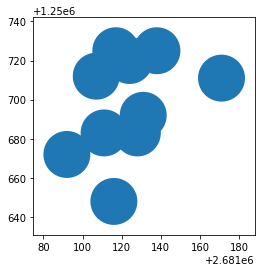

In [28]:
# Musterlösung

zeckenstiche_buffer = zeckenstiche_gpd.buffer(12)
zeckenstiche_buffer.plot()

% : Umrisse visualisieren
### Übung 13.3

Extrahiere die Umrisse von `zeckenstiche_buffer` und speichere diese in `zeckenstiche_buffer_outline`. Visualisiere anschliessend diese Umrisse.

In [29]:
# Musterlösung

zeckenstiche_buffer_outline = zeckenstiche_buffer.boundary

<AxesSubplot:>

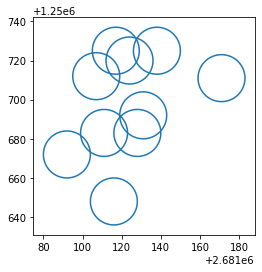

In [30]:
zeckenstiche_buffer_outline.plot()

% : Layers überlagern
### Übung 13.4

Nutze nachstehenden Code um zwei Datensätze im gleichen Plot darzustellen. 

<AxesSubplot:>

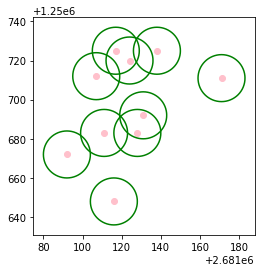

In [31]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()

zeckenstiche_buffer_outline.plot(ax = ax, color = "green")
zeckenstiche_gpd.plot(ax = ax, color = "pink")

% Envelope
### Übung 13.5

Berechne das "Envelope" von `zeckenstiche_gpd` anhand der obigen Beispielen. Speichere den Output als `zeckenstiche_envelope`.

```{tip}
:class: dropdown
Denk daran, dass du zuerst noch einen Union machen musst (siehe {ref}`chap-raeumliche-operationen`)
```


In [32]:
# Musterlösung

zeckenstiche_envelope = zeckenstiche_gpd.unary_union.envelope

% Overlay Operation
### Übung 13.6

Führe die Overlay Operationen *Union* und *Symetrical Difference* zwischen `zeckenstiche_envelope` und `zeckenstiche_buffer` durch. Schaue dir dazu die entsprechende [Geopandas Hilfeseite](https://geopandas.org/set_operations.html#set-operations-with-overlay) an. 

```{tip}
:class: dropdown
- `zeckenstiche_envelope` musst zu zuerst noch in eine GeoSeries umwandeln. Den Ouput davon kannst du in eine GeoDataFrame konvertieren
- `zeckenstiche_buffer` sollte schon eine GeoSeries sein, diese kannst du direkt in eine GeoDataFrame konvertieren
- beim Konvertieren in eine GeoDataFrame kannst du jeweils direkt das Koordinatensystem (`crs = `) korrekt setzen. 
```

In [34]:
# Musterlösung

zeckenstiche_buffer_gdf = gpd.GeoDataFrame(geometry = zeckenstiche_buffer, crs = 2056)

zeckenstiche_envelope_gdf = gpd.GeoDataFrame(geometry = gpd.GeoSeries(zeckenstiche_envelope), crs = 2056)

my_union = gpd.overlay(zeckenstiche_envelope_gdf, zeckenstiche_buffer_gdf, how = "union")

my_symmdiff = gpd.overlay(zeckenstiche_envelope_gdf, zeckenstiche_buffer_gdf, how = "symmetric_difference")


NameError: name 'my_union' is not defined

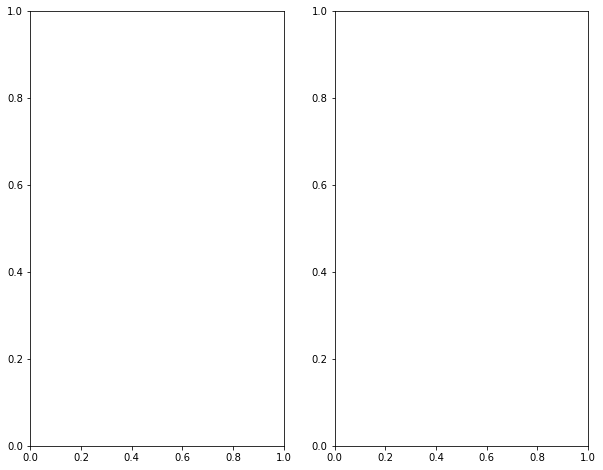

In [8]:
# Das Resultat sollte folgendermassen aussehen

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,8))

my_union.plot(ax = ax1)
ax1.set_title("Union")
my_symmdiff.plot(ax = ax2)
ax2.set_title("Symetrical Difference")

### Übung 13.7 

Exportiere `zeckenstiche_gpd` als "Geopackage" mit dem Namen "zeckenstiche.gpkg". Lese nochmal {ref}`chappythongisformate` wenn du nicht mehr weisst, wie das geht. Versuche anschliessend, "zeckenstiche.gpgk" wieder einzulesen.

```python
# Musterlösung

zeckenstiche_gpd.to_file("zeckenstiche.gpkg")
```